# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction

< y >
* **Price** : The price of the used car in INR Lakhs.



< X >
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [5]:
# Load Data
data = pd.read_csv("assignment2_data.csv", index_col=0)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
data = pd.read_csv("assignment2_train-data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [11]:
import pandas as pd
import re
## 숫자만 사용

def extract_numbers(s):
    numbers = re.findall(r'\d+\.\d+|\d+', str(s))
    if numbers:
        return float(numbers[0])  # 숫자를 float로 변환
    else:
        return 0  # 숫자가 없는 경우 0 반환

In [19]:
data['Mileage'] = data['Mileage'].apply(extract_numbers)
data['Engine'] = data['Engine'].apply(extract_numbers)
data['Power'] = data['Power'].apply(extract_numbers)

#결측치 제거

data = data.dropna()


In [20]:
X = data.loc[:,['Year','Kilometers_Driven','Mileage','Engine','Power','Seats']]
y = data['Price']

## XY 설정

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 회귀분석
X_with_intercept = sm.add_constant(X)  # 상수항 추가
model = sm.OLS(y, X_with_intercept)
result = model.fit()

In [23]:
# 회귀계수 및 통계량 출력
print(result.summary())

## 1.3223
## -0.0000312
## 0.0697
## 0.0068
## 0.1544
## -1.8781

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     279.3
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          4.99e-194
Time:                        12:38:30   Log-Likelihood:                -2932.4
No. Observations:                 824   AIC:                             5879.
Df Residuals:                     817   BIC:                             5912.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2671.6261    304.83

Text(0.5, 1.0, 'Q-Q Plot')

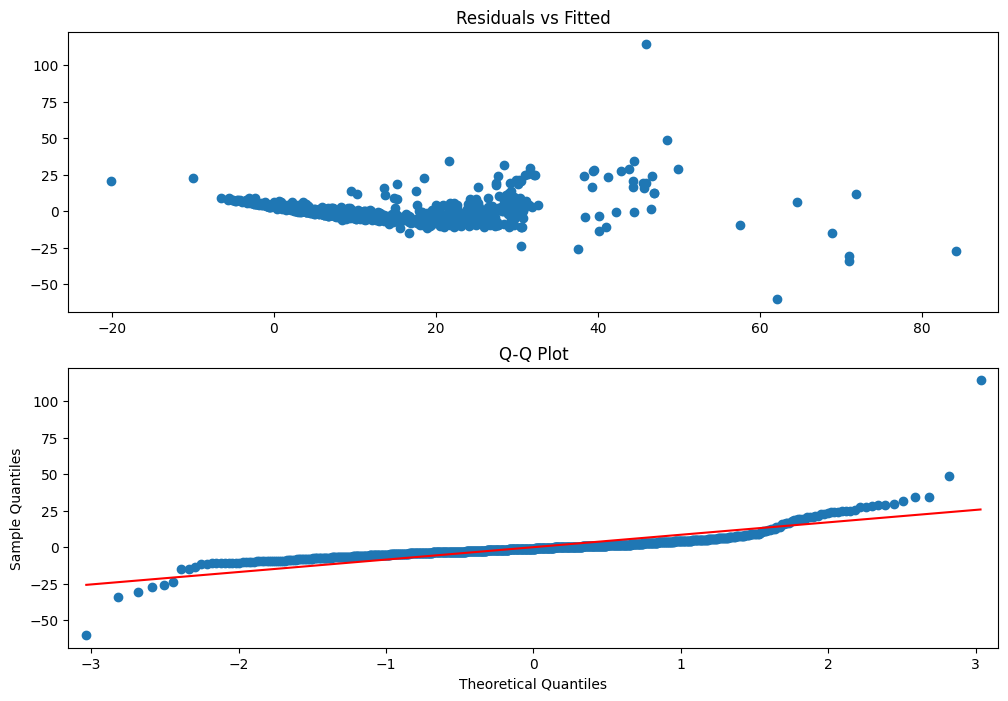

In [29]:
# 회귀진단
fig, ax = plt.subplots( 2, figsize=(12, 8))

# 예측값과 잔차
ax[0].scatter(result.fittedvalues, result.resid)
ax[0].set_title('Residuals vs Fitted')

# Q-Q 플롯
sm.qqplot(result.resid, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot')


잔차가 중앙에 몰려있는 것을 볼 수 있고 QQplot을 통해 대부분 선형을 띄우므로 정규성을 꽤 만족한다.